In [2]:
import utils
import torch
import data
import torchvision.transforms as transforms
import numpy

Files already downloaded and verified
Files already downloaded and verified


In [3]:
# transform_observe = transforms.Compose([numpy.asarray]) # transform.ToTensor would norm the color value to [0,1]
transform_observe = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))])

In [4]:
train_ds = data.NewCifer10("train")
train_ds_tr = data.NewCifer10("train",transform=transform_observe)

In [10]:
for i in range(10):
    train_ds[i][0].save(f"./image_example/{i}.png")

In [5]:
train_ds[0][1] # 6:frog

6

In [6]:
print(train_ds_tr[0][0][0,0,0],
train_ds_tr[0][0][1,0,0],
train_ds_tr[0][0][2,0,0])

tensor(-1.2854) tensor(-1.1989) tensor(-0.9922)


In [7]:
train_ds_tr[0][1]

6

In [8]:
fig_sum = numpy.zeros_like(train_ds_tr[0][0],dtype = numpy.int64)
class_statistic = [0 for _ in range(10)]
train_set_count = 0

In [10]:
for fig,label in train_ds_tr:
    fig_sum = numpy.add(fig_sum,fig)
    class_statistic[label]+=1
    train_set_count+=1

In [11]:
fig_sum[0,0,0]

tensor(4253.9819, dtype=torch.float64)

In [13]:
fig_mean = fig_sum/train_set_count
mean_color = fig_mean.mean(axis = (1,2))
print(fig_sum.shape,fig_mean.shape)
print(mean_color)

torch.Size([3, 32, 32]) torch.Size([3, 32, 32])
tensor([-6.9136e-04, -5.6388e-04, -4.8284e-05], dtype=torch.float64)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


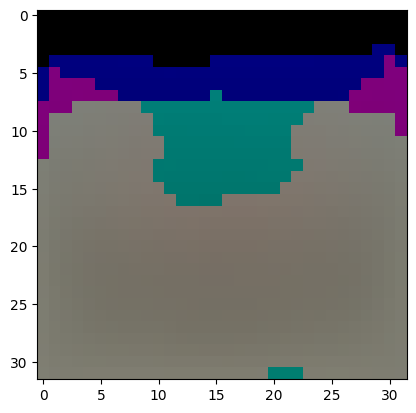

In [ ]:
from PIL import Image
img_mean = fig_mean.astype(numpy.int8)
import matplotlib
from matplotlib import pyplot as plt
plt.imshow(img_mean)
plt.show()

In [ ]:
class_statistic

[3972, 4058, 3993, 4000, 4014, 3994, 3980, 3980, 4007, 4002]

In [ ]:
train_set_count

40000

In [ ]:
[f"{x*100/train_set_count}%" for x in class_statistic]

['9.93%',
 '10.145%',
 '9.9825%',
 '10.0%',
 '10.035%',
 '9.985%',
 '9.95%',
 '9.95%',
 '10.0175%',
 '10.005%']

In [32]:
cmfig = numpy.array([[[125.27133362, 122.93232427, 113.8550241] for _ in range(32)] for _ in range(32)])
cmfig.shape
cmfig.dtype
cmfig = cmfig.astype(numpy.uint8)

In [33]:
tcmfig = transforms.ToTensor()(cmfig)
ntcmfig = transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))(tcmfig)

# ntcmfig = transform_observe(cmfig)

In [37]:
torch.set_printoptions(precision=20)
print(tcmfig[0,0,0],
tcmfig[1,0,0],
tcmfig[2,0,0])
print(ntcmfig[0,0,0],
ntcmfig[1,0,0],
ntcmfig[2,0,0])

tensor(0.49019607901573181152) tensor(0.47843137383460998535) tensor(0.44313725829124450684)
tensor(-0.00595118338242173195) tensor(-0.01889981515705585480) tensor(-0.01673007383942604065)
